In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders
import numpy as np
import cv2
import os
import scipy

In [2]:
print (os.listdir("C:/Kaggle/Real_and_Fake_Face_Detection/archive"))

['real_and_fake_face', 'real_and_fake_face_detection']


In [3]:
real = "C:/kaggle/Real_and_Fake_Face_Detection/archive/real_and_fake_face/training_real/"
fake = "C:/kaggle/Real_and_Fake_Face_Detection/archive/real_and_fake_face/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [4]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[..., ::-1]

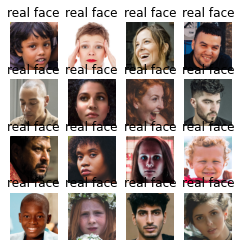

In [5]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.title('real face')
    plt.axis('off')

plt.show()

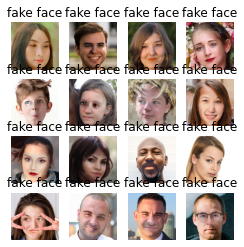

In [6]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.title('fake face')
    plt.axis('off')
plt.show()

In [7]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,)

In [8]:
dataset_path = "C:/kaggle/Real_and_Fake_Face_Detection/archive/real_and_fake_face"

In [9]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode='binary',
                                          target_size=(96, 96),
                                          batch_size=32)

Found 2041 images belonging to 2 classes.


In [10]:
mobilenetV2 = MobileNetV2(input_shape=(96, 96, 3),
                          include_top=False,
                          weights='imagenet')

average_layer = GlobalAvgPool2D()

model = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\roytravel\anaconda3\envs\pattern\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001
    else:
        return 0.00001

early_stop= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model.fit_generator(train,
                    epochs=50,
                    callbacks=[lr_callbacks, early_stop])

Epoch 1/50
64/64 [==============================] - 38s 584ms/step - loss: 0.3953 - accuracy: 0.8270

In [ ]:
model.evaluate_generator(train)

In [ ]:
model.save("model.h5")